###  ECE ENGR 219
# Project 3: Collaborative Filtering

####  Question 1: Compute the sparsity of the movie rating dataset

In [444]:
import csv

movieCount = 0
with open('ml-latest-small/movies.csv', 'r', encoding='utf-8') as csvfile:
    rreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            movieCount += 1


rating_count = 0
lastUser = 0
with open('ml-latest-small/ratings.csv', 'r') as csvfile:
    rreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            #print(row)
            if int(row[0].split(',')[0]) > lastUser:
                lastUser = int(row[0].split(',')[0])
            rating_count += 1

        
print("Number of movies: ", movieCount, lastUser)
total_rating = lastUser * movieCount
print("Number of available ratings: ", rating_count)
print("Density of matrix: ", rating_count/total_rating)
print("Sparsity of matrix: ", (1 - rating_count/total_rating))

Number of movies:  9125 671
Number of available ratings:  100004
Density of matrix:  0.01633285017250883
Sparsity of matrix:  0.9836671498274911


#### Question 2: Plot a histogram showing the frequency of the rating values 

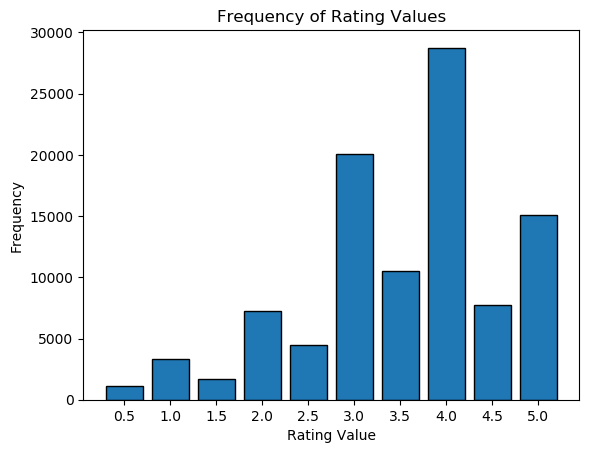

In [420]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

ratings = list()

with open('ml-latest-small/ratings.csv', 'r') as csvfile:
    rreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            ratings.append(float(row[0].split(",")[2]))

            
n = plt.hist(ratings)
plt.clf()
plt.bar(np.arange(0.5, 5.5, 0.5), n[0], align='center', width=0.4, edgecolor='black')
plt.title('Frequency of Rating Values')
plt.ylabel('Frequency')
plt.xlabel('Rating Value')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()

#### Question 3: Plot the distribution of ratings among movies 

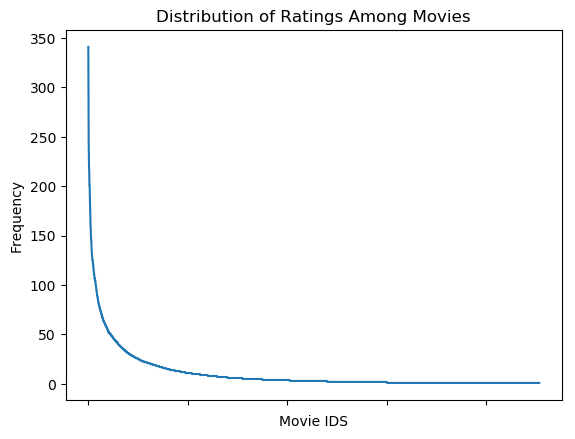

In [337]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

movie_ratings_count_map = {}

with open('ml-latest-small/ratings.csv', 'r') as csvfile:
    rreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            movie_id = row[0].split(",")[1]
            
            if movie_id in movie_ratings_count_map:
                movie_ratings_count_map[movie_id] += 1
            else:
                movie_ratings_count_map[movie_id] = 1

movie_id_list = []
movie_rating_count_list = []

for w in sorted(movie_ratings_count_map, key=movie_ratings_count_map.get, reverse=True):
    movie_id_list.append(int(w))
    movie_rating_count_list.append(int(movie_ratings_count_map[w]))

f = movie_rating_count_list
 
y_pos = np.arange(len(f))
 
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.plot(y_pos,f)
plt.title('Distribution of Ratings Among Movies')
plt.xlabel('Movie IDS')
plt.ylabel('Frequency')
plt.show()

#### Question 4:  Plot the distribution of ratings among users

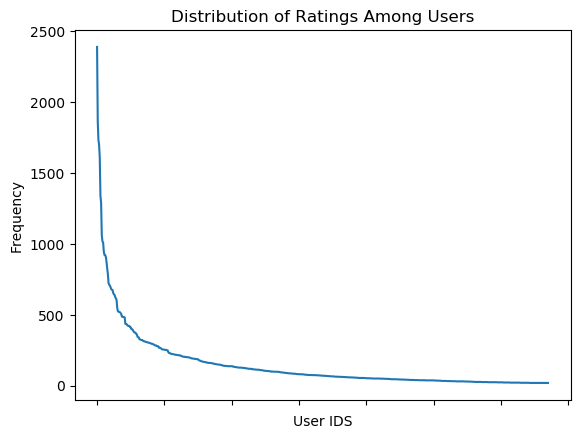

In [338]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

user_ratings_count_map = {}

with open('ml-latest-small/ratings.csv', 'r') as csvfile:
    rreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            userID = row[0].split(",")[0]
            
            if userID in user_ratings_count_map:
                user_ratings_count_map[userID] += 1
            else:
                user_ratings_count_map[userID] = 1

user_id_list = []
rating_count_list = []

for w in sorted(user_ratings_count_map, key=user_ratings_count_map.get, reverse=True):
    user_id_list.append(int(w))
    rating_count_list.append(int(user_ratings_count_map[w]))

# print(user_id_list[:5])
# print(rating_count_list[:5])
f = rating_count_list
 
y_pos = np.arange(len(f))
 
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.plot(y_pos,f)
plt.title('Distribution of Ratings Among Users')
plt.xlabel('User IDS')
plt.ylabel('Frequency')
plt.show()

#### Question 6:  Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

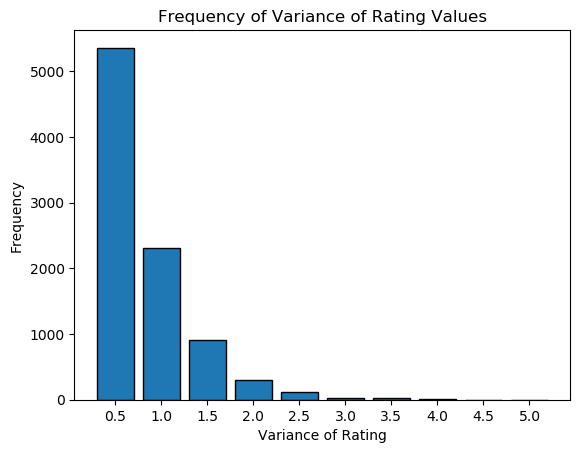

In [423]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

movieRatings = dict()
with open('ml-latest-small/ratings.csv', 'r') as csvfile:
    rreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            movieID = row[0].split(",")[1]
            rating = float(row[0].split(",")[2])
            
            if movieID in movieRatings:
                movieRatings[movieID].append(rating)
            else:
                ratingList = list()
                ratingList.append(rating)
                movieRatings[movieID] = ratingList
                
varianceMap = dict()
for movie in movieRatings:
    varArray = np.array(movieRatings[movie])
    varianceMap[movie] = np.var(varArray)
    
n = plt.hist(varianceMap.values())
plt.clf()
plt.bar(np.arange(0.5, 5.5, 0.5), n[0], align='center', width=0.4, edgecolor='black')
plt.title('Frequency of Variance of Rating Values')
plt.ylabel('Frequency')
plt.xlabel('Variance of Rating')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()

Naive Collaboration Filter Class

In [374]:
from surprise.prediction_algorithms.predictions import Prediction

class NaiveCollaborative:    
    tmap = dict()
    
    def __init__(self):
        self.tmap = dict()
        
    def fit(self, trainset):
        
        for entry in trainset.all_ratings():
            uid = str(trainset.to_raw_uid(entry[0]))
            iid = str(trainset.to_raw_iid(entry[1]))
            rating = entry[2]
            e = (uid, iid, rating)

            if uid in self.tmap:
                self.tmap[uid].append(e)
            else:
                self.tmap[uid] = list()
                self.tmap[uid].append(e)
                                
        return
        
    def test(self, testset, verbose):
        predicted_list = []

        for entry in testset:
            est = 0
            
            if entry[0] in self.tmap:
                l = self.tmap[entry[0]]
                
                mean_rating = []
                for rating in l:
                    mean_rating.append(rating[2])
                 
                est = sum(mean_rating)/len(mean_rating)
            else:
                est = 0
                
            p = Prediction(entry[0], entry[1], entry[2], est, {})
            predicted_list.append(p)
                        
        return predicted_list

Trimming Functions

In [341]:
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
import numpy as np


def buildPopularTrimmedTestSet(testset, tmap):
    deleted_movie_ids = []

    for key in tmap:
        if len(tmap[key]) <= 2:
            deleted_movie_ids.append(key)

    popularTrimmedMovieTuples = []

    for entry in testset:
        if entry[1] not in deleted_movie_ids:
            popularTrimmedMovieTuples.append(entry)
    
    return popularTrimmedMovieTuples



def buildUnPopularTrimmedTestSet(testset, tmap):
    deleted_movie_ids = []

    for key in tmap:
        if len(tmap[key]) > 2:
            deleted_movie_ids.append(key)
            
    unpopularTrimmedMovieTuples = []

    for entry in testset:
        if entry[1] not in deleted_movie_ids:
            unpopularTrimmedMovieTuples.append(entry)
            
    return unpopularTrimmedMovieTuples


def buildVarianceTrimmedTestSet(testset, tmap):
    deleted_movie_ids = []
    
    varianceMap = dict()
    for movie in tmap:
        l2 = list()
        for l in tmap[movie]:
            l2.append(l[2])
        varianceMap[movie] = np.var(np.array(l2))
    
    for key in tmap:
        if len(tmap[key]) < 5 or varianceMap[key] < 2:
            deleted_movie_ids.append(str(key))
        
    varianceTrimmedMovieTuples = []

    for entry in testset:
        if str(entry[1]) not in deleted_movie_ids:
            varianceTrimmedMovieTuples.append(entry)
            
    return varianceTrimmedMovieTuples



Function for performing collaborative filtering and generating ROC curves

In [342]:
from surprise import KNNWithMeans
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold
from surprise import accuracy
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn import metrics
from surprise.model_selection import train_test_split

def getAlgo(name, k):
    algo = None
    
    if name == "KNNWithMeans":
        sim_options = {'name' : 'pearson'}
        algo = KNNWithMeans(k = k, sim_options = sim_options, verbose=False)
    elif name == "NMF":
        algo = NMF(n_factors=k, random_state=42)
    elif name == "SVD":
        algo = SVD(n_factors=k, random_state=42)
    elif name == "NaiveCollaborative":
        algo = NaiveCollaborative()
#     elif name == "NMF":
#     elif name == "NMF":        
    else:
        algo = None
    
    return algo

def getTrimmedTestSet(trim, testset, tmap):
    if trim == "Popular":
        testset = buildPopularTrimmedTestSet(testset, tmap)
    elif trim == "UnPopular":
        testset = buildUnPopularTrimmedTestSet(testset, tmap)
    elif trim == "Variance":
        testset = buildVarianceTrimmedTestSet(testset, tmap)
    else:
        testset = testset
        
    return testset
    
def runKFoldAlgo(algoName, trim, KFoldSplits, KFoldRangeLow, KFoldRangeHigh, KFoldRangeStep):
    reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale = (0.5,5))
    file_path = 'ml-latest-small/ratings.csv'

    data = Dataset.load_from_file(file_path, reader=reader)
    fullDataSet = data.build_full_trainset()
    cmap = dict()

    for entry in fullDataSet.all_ratings():
        uid = str(fullDataSet.to_raw_uid(entry[0]))
        iid = str(fullDataSet.to_raw_iid(entry[1]))
        rating = entry[2]
        e = (uid, iid, rating)

        if iid in cmap:
            cmap[iid].append(e)
        else:
            cmap[iid] = list()
            cmap[iid].append(e)
        
    kf = KFold(n_splits=KFoldSplits)

    krmse = []
    kmae = []
    krange = range(KFoldRangeLow,KFoldRangeHigh,KFoldRangeStep)

    for k in range(KFoldRangeLow,KFoldRangeHigh,KFoldRangeStep):
        print("Running for k = ", k)
        algo = getAlgo(algoName, k)

        rmse = []
        mae = []
        for trainset, testset in kf.split(data):

            algo.fit(trainset)

            testset = getTrimmedTestSet(trim, testset, cmap)        
            predictions = algo.test(testset, verbose=False)

            rmse.append(accuracy.rmse(predictions, verbose=False))
            mae.append(accuracy.mae(predictions, verbose=False))

        krmse.append(np.mean(rmse))
        kmae.append(np.mean(mae))

    if algoName != 'NaiveCollaborative':

        plt.plot(krange, krmse, label="Root Mean Square Error")
        plt.title('Root Mean Square Error Vs K')
        plt.show()
        plt.plot(krange, kmae, label="Mean Absolute Error")
        plt.title('Mean Absolute Error Vs k')
        plt.show()
        
        for i in range(len(krmse)-2):
            if krmse[i] - krmse[i+1] < 0.001:
                break

        best_k = 2*(i+1)        
        print("Average RMSE and MAE converge for k = ", 2*(i+1))
        print("Average RMSE at convergence: ", krmse[i])
        print("Average MAE at convergence: ", kmae[i])

        return best_k, krmse, kmae
    else:
        return krmse[0], kmae[0]


def runAlgoROC(algoName, trim, split, thresholds, best_k):

    reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale=(0.5,5))
    file_path = 'ml-latest-small/ratings.csv'

    data = Dataset.load_from_file(file_path, reader=reader)

    trainset, testset = train_test_split(data, test_size=split)        

    y_test = list()
    for i in range(len(testset)):
        y_test.append(testset[i][2])

    for threshold in thresholds:
        algo = getAlgo(algoName, best_k)

        algo.fit(trainset)
        predictions = algo.test(testset, verbose=False)

        pred = list()
        transformedY = list()        
    
        for i in range(len(predictions)):
            pred.append(predictions[i].est)
            if y_test[i] < threshold:
                transformedY.append(0)
            else:
                transformedY.append(1)

        fpr, tpr, thresholds = metrics.roc_curve(transformedY, pred)
        roc_auc = metrics.auc(fpr, tpr)
        title = 'Receiver Operating Characteristic for threshold: ' +  str(threshold)
        plt.title(title)
        plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xticks(np.arange(start = 0, stop = 1.1, step = 0.1))
        plt.yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    return

Function for plotting ROC curves for multiple filters

In [343]:
def combinedROC(algoNames, split, threshold, bestkDict):
    reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale=(0.5, 5))
    file_path = 'ml-latest-small/ratings.csv'

    data = Dataset.load_from_file(file_path, reader=reader)

    trainset, testset = train_test_split(data, test_size=split)
    colors = ['b', 'g', 'k']
    
    y_test = list()
    for i in range(len(testset)):
        y_test.append(testset[i][2])
      
    j = 0
    
    for algoName in algoNames:
        algo = getAlgo(algoName, bestkDict[algoName])
        #print(algoName)
        algo.fit(trainset)
        predictions = algo.test(testset, verbose=False)

        pred = list()
        transformedY = list()
        for i in range(len(predictions)):
            pred.append(predictions[i].est)

            if y_test[i] < threshold:
                transformedY.append(0)
            else:
                transformedY.append(1)

        fpr, tpr, thresholds = metrics.roc_curve(transformedY, pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[j], label = 'Filter: %s AUC = %0.2f' % (algoName,roc_auc))
        j += 1
        

       
    plt.title('Receiver Operating Characteristic for Different Filters')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xticks(np.arange(start = 0, stop = 1.1, step = 0.1))
    plt.yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return

####  Question 10: Design a k-NN collaborative filter to predict the ratings of the 4 movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Sweep k ( number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

#### Question 11: Use the plot from question 10, to find a 'minimum k'. Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE

Running for k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computin

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  44
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  46
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  86
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

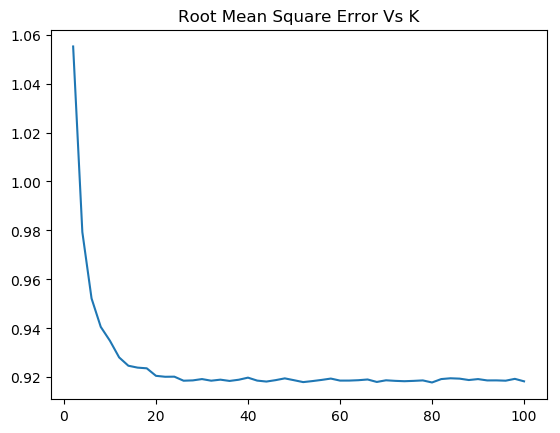

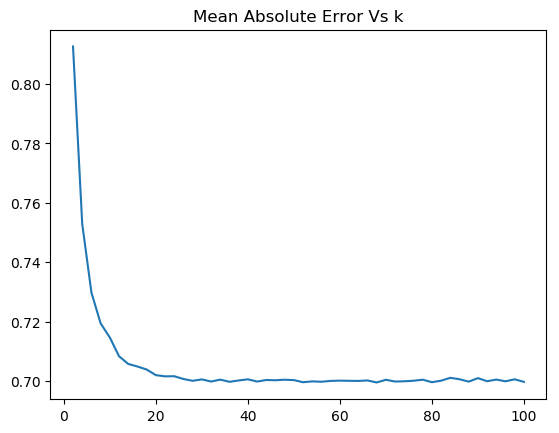

Average RMSE and MAE converge for k =  14
Average RMSE at convergence:  0.924729197949
Average MAE at convergence:  0.705773922421


In [344]:
knn_best_k, krmse_knn, kmae_knn = runKFoldAlgo("KNNWithMeans", None, 10, 2, 102, 2)

#### Question 12: Design a k-NN collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it's performance using 10-fold cross validation. Sweep k ( number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computin

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  44
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  46
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  86
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

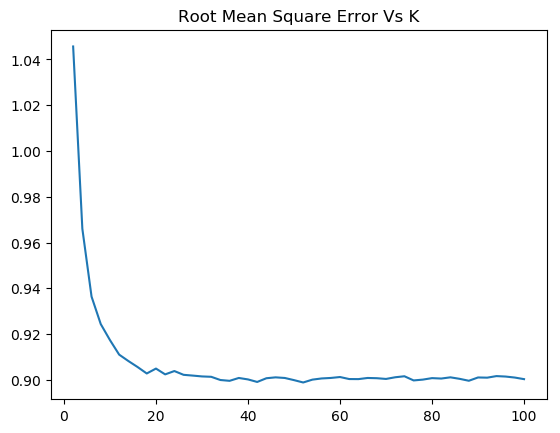

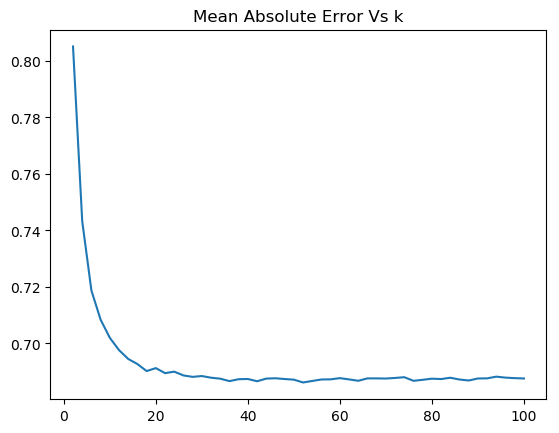

Average RMSE and MAE converge for k =  18
Average RMSE at convergence:  0.902753810713
Average MAE at convergence:  0.690215621104


(18,
 [1.0456834731276419,
  0.96601716819815986,
  0.93635977613257604,
  0.92434307636875945,
  0.9173583285318081,
  0.91099541274955786,
  0.90819808821836678,
  0.90558239138075769,
  0.90275381071341165,
  0.90489826697731668,
  0.90235851665977462,
  0.90381818506430744,
  0.90216660737952825,
  0.90183142984829257,
  0.90146328773123463,
  0.90130424711443202,
  0.89990090209155371,
  0.89954233179814447,
  0.90079069314979887,
  0.90015679604666377,
  0.89905226969615715,
  0.90067327566930933,
  0.90106074453406093,
  0.90078953396294048,
  0.8998507044068953,
  0.89882017471488018,
  0.90006240856171327,
  0.90057804277076703,
  0.90079907972461259,
  0.90120351680274813,
  0.90031983274604177,
  0.90029225618658448,
  0.90079106739978576,
  0.9006854260532563,
  0.90036720615839627,
  0.90109925222494813,
  0.90154029680529268,
  0.89971390874308221,
  0.90007299482683467,
  0.90072315829691474,
  0.90053822803848615,
  0.90106960235819622,
  0.90041415954184989,
  0.899568

In [345]:
runKFoldAlgo("KNNWithMeans", "Popular", 10, 2, 102, 2)

#### Question 13: Design a k-NN collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computin

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  44
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  46
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  86
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

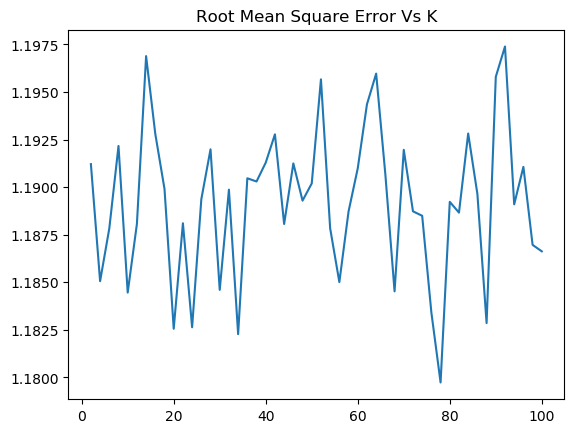

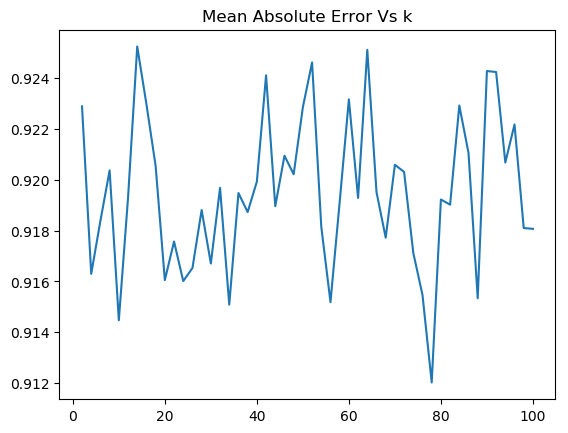

Average RMSE and MAE converge for k =  4
Average RMSE at convergence:  1.18505833315
Average MAE at convergence:  0.916300880833


(4,
 [1.1912096774557557,
  1.1850583331454785,
  1.1878268977696465,
  1.1921622826097755,
  1.1844587291709565,
  1.1880649229602629,
  1.196883203000225,
  1.1927911783463856,
  1.1899009483450578,
  1.1825582007613704,
  1.1881007078487027,
  1.1826362618755226,
  1.1893631997674616,
  1.1919842402250906,
  1.1846011816269688,
  1.1898670432353551,
  1.1822736681579111,
  1.1904645356075707,
  1.1902950151835037,
  1.1912869574813398,
  1.1927723826516186,
  1.1880620738229626,
  1.1912450447608818,
  1.1892893238507272,
  1.1901928148088843,
  1.1956627443438559,
  1.1878348892406883,
  1.1850089211351404,
  1.1887199140657598,
  1.1909892714321031,
  1.1943505971157542,
  1.1959644658407373,
  1.1906633443051531,
  1.1845235410886363,
  1.1919580202586002,
  1.1887274912336223,
  1.1884938247222254,
  1.1834095219720639,
  1.1797357001037052,
  1.1892263521480779,
  1.1886597644577965,
  1.1928161970494175,
  1.189639693743588,
  1.1828538635581762,
  1.1957949333972997,
  1.1973

In [346]:
runKFoldAlgo("KNNWithMeans", "UnPopular", 10, 2, 102, 2)

#### Question 14: Design a k-NN collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computin

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  44
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  46
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Running for k =  86
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson 

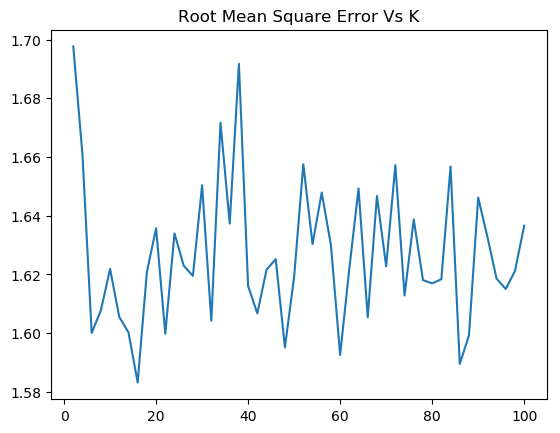

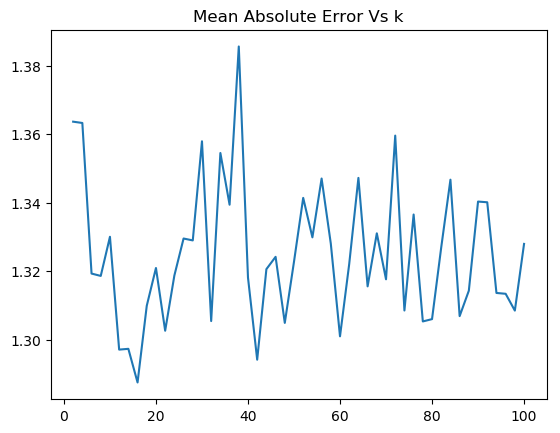

Average RMSE and MAE converge for k =  6
Average RMSE at convergence:  1.60010770196
Average MAE at convergence:  1.31931112593


(6,
 [1.6976362113814765,
  1.6607958890001833,
  1.6001077019596921,
  1.6077667434032556,
  1.6218962601200713,
  1.6055243598810272,
  1.6002652796736847,
  1.5832288392820195,
  1.6208122452424039,
  1.6357517635154419,
  1.5998275038189356,
  1.6339998034362815,
  1.6230161893087185,
  1.6195132079212637,
  1.6503786625832728,
  1.6042773701257815,
  1.671673067598227,
  1.6373622934361269,
  1.6917253827335723,
  1.6160791637941503,
  1.6067505431485749,
  1.6216215009825579,
  1.625228024939366,
  1.5951621321977423,
  1.6192103292456284,
  1.6575139178911358,
  1.6303424624783933,
  1.6479118967798765,
  1.6300168452607395,
  1.5926080042408972,
  1.6220941997961855,
  1.6492605732967636,
  1.6054370792490578,
  1.6467321014499336,
  1.6228193783536871,
  1.6572414676625489,
  1.6128480208583618,
  1.6387645392082966,
  1.6180782721756994,
  1.6169759586747925,
  1.6183966148926583,
  1.6567935530126405,
  1.5895391781324419,
  1.5992606386988175,
  1.6461798867379216,
  1.6328

In [347]:
runKFoldAlgo("KNNWithMeans", "Variance", 10, 2, 102, 2)

#### Question 15: Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the k found in question 11. For each of the plots, also report the area under the curve (AUC) value.

Computing the pearson similarity matrix...
Done computing similarity matrix.


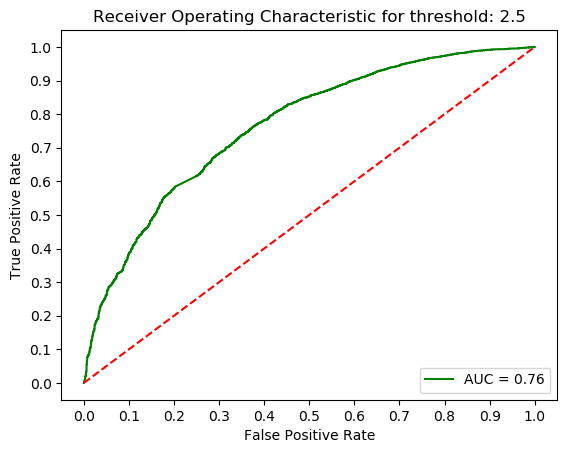

Computing the pearson similarity matrix...
Done computing similarity matrix.


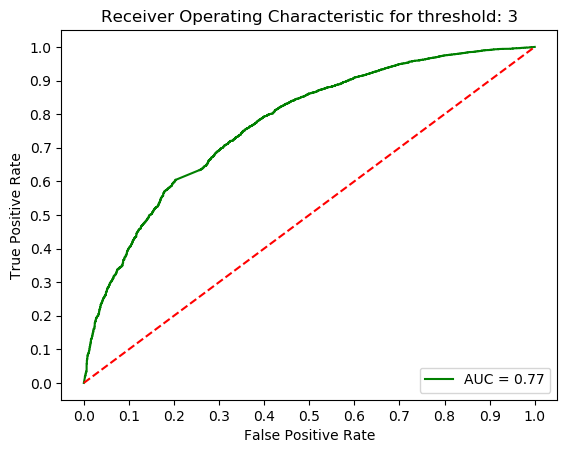

Computing the pearson similarity matrix...
Done computing similarity matrix.


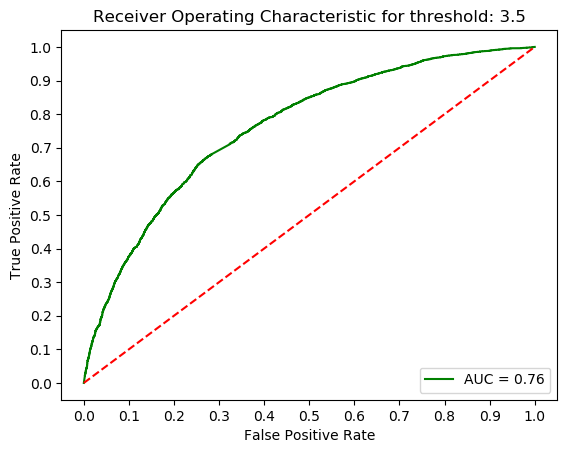

Computing the pearson similarity matrix...
Done computing similarity matrix.


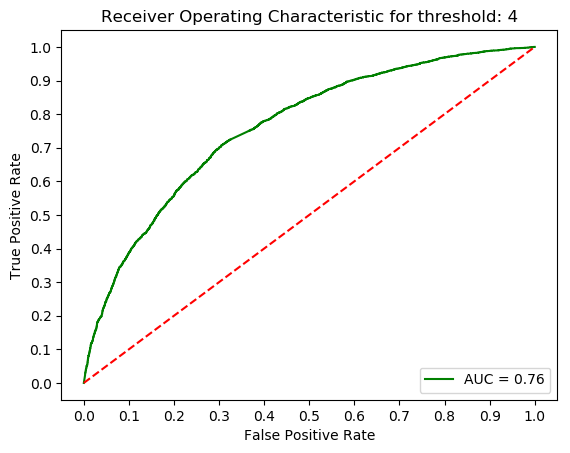

In [348]:
runAlgoROC("KNNWithMeans", None, 0.1, [2.5,3,3.5,4], knn_best_k)

#### Question 17: Design a NNMF-based collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

#### Question 18: Use the plot from question 17, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


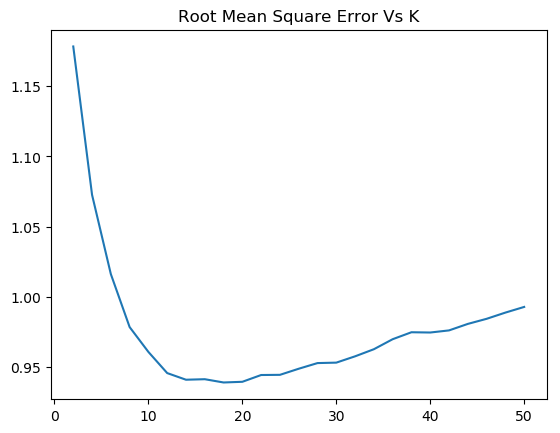

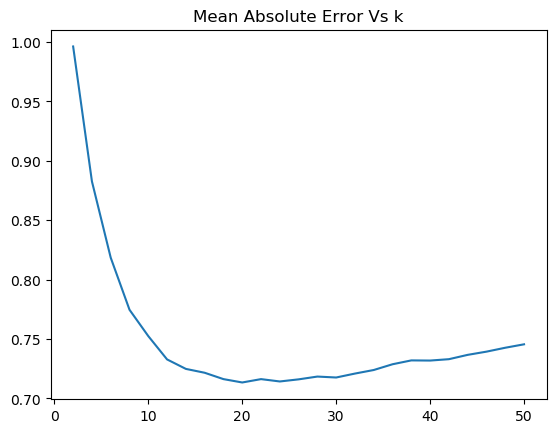

Average RMSE and MAE converge for k =  14
Average RMSE at convergence:  0.940908295864
Average MAE at convergence:  0.724827207762


In [349]:
nmf_best_k, krmse_nmf, kmae_nmf = runKFoldAlgo("NMF", None, 10, 2, 52, 2)

In [438]:
nmf_best_k = 2 * (kmae_nmf.index(min(kmae_nmf)) + 1)
print("Optimal Number of Latent Factors: ", nmf_best_k)
print("Minimum RMSE: ", min(krmse_nmf))
print("Minimum MAE: ", min(kmae_nmf))

Optimal Number of Latent Factors:  20
Minimum RMSE:  0.938948991763
Minimum MAE:  0.713393470868


#### Question 19: Design a NNMF collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


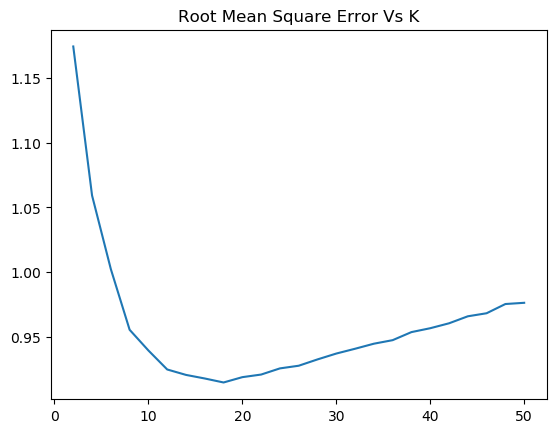

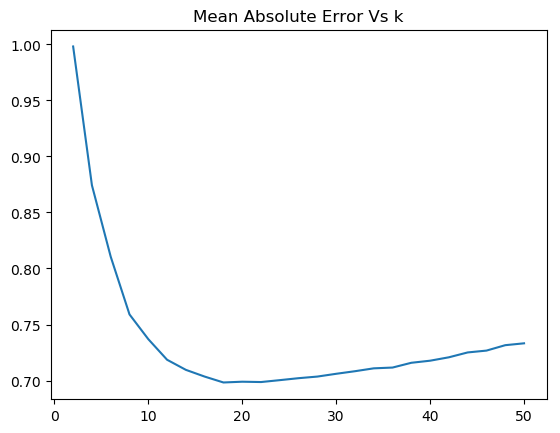

Average RMSE and MAE converge for k =  18
Average RMSE at convergence:  0.914899921666
Average MAE at convergence:  0.698260728887


(18,
 [1.1742158096065638,
  1.059221489732789,
  1.0023827504423846,
  0.95556848791310434,
  0.93958431093252648,
  0.9249348684933516,
  0.92074286007574491,
  0.9179769508785881,
  0.91489992166569023,
  0.91901082587135241,
  0.9210182824436457,
  0.92577320082763825,
  0.92782709359540783,
  0.93270447650278354,
  0.93722840296710963,
  0.94093000017158102,
  0.94482447611964093,
  0.94756215557180568,
  0.95378214565311903,
  0.95677605593699622,
  0.96057003226700988,
  0.96597804081862504,
  0.96832847654254706,
  0.97544795860490985,
  0.97639056252559331],
 [0.99815913686462743,
  0.8742636773541792,
  0.81050739351030876,
  0.75900174311747359,
  0.73693173266531475,
  0.71854285245592309,
  0.70952980511065578,
  0.70352318787698143,
  0.69826072888730917,
  0.69894543995490088,
  0.69864785957865505,
  0.70034241111137119,
  0.70209486418613964,
  0.70353326749325007,
  0.70601370355616588,
  0.70831424850686298,
  0.71088421100868737,
  0.71157909233086092,
  0.715837916

In [350]:
runKFoldAlgo("NMF", "Popular", 10, 2, 52, 2)

#### Question 20: Design a NNMF collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


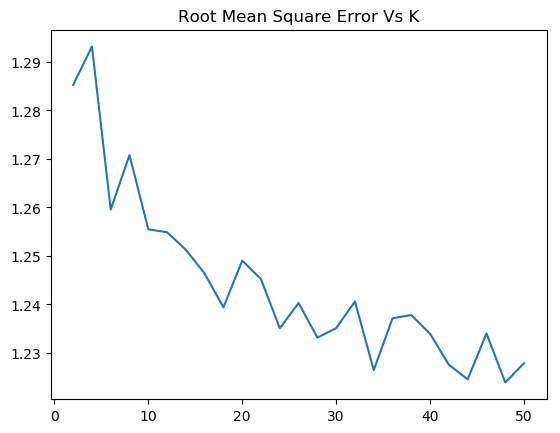

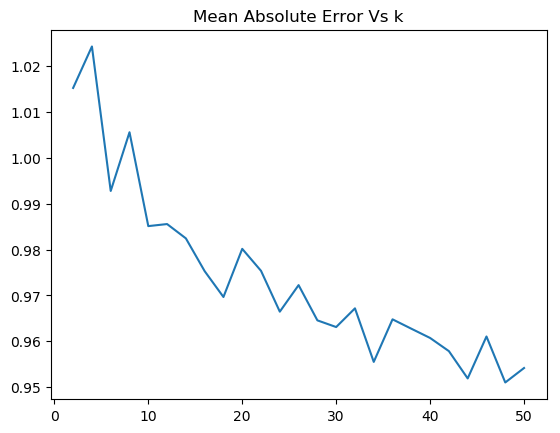

Average RMSE and MAE converge for k =  2
Average RMSE at convergence:  1.2852114848
Average MAE at convergence:  1.01519360665


(2,
 [1.2852114848027323,
  1.293162935264689,
  1.2595705463087756,
  1.2707848562589175,
  1.2554885457492106,
  1.2548759495867716,
  1.2512628638177206,
  1.2463682817928341,
  1.2394019092413808,
  1.2490457484721342,
  1.2452119324130413,
  1.2351064527672002,
  1.2402954014694054,
  1.23317745478515,
  1.2351215559387216,
  1.2406165942186507,
  1.2264630406916928,
  1.237155140018027,
  1.2378209320571989,
  1.2339512884656225,
  1.227571645962187,
  1.2245800323660974,
  1.2340328238089362,
  1.2239248216322236,
  1.2278974923210817],
 [1.0151936066496536,
  1.0242273901596568,
  0.99275445813864693,
  1.0055443738269019,
  0.98509612560838788,
  0.98554493047925484,
  0.98242727333105562,
  0.97528367637878366,
  0.96965558029655075,
  0.98014375862442704,
  0.97535366394799505,
  0.96646119825007504,
  0.97224205062284474,
  0.96456547269409132,
  0.96310959397343954,
  0.96718315488167639,
  0.9555180662530578,
  0.96478885587066576,
  0.96274859311645444,
  0.9607287920785

In [351]:
runKFoldAlgo("NMF", "UnPopular", 10, 2, 52, 2)

#### Question 21: Design a NNMF collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


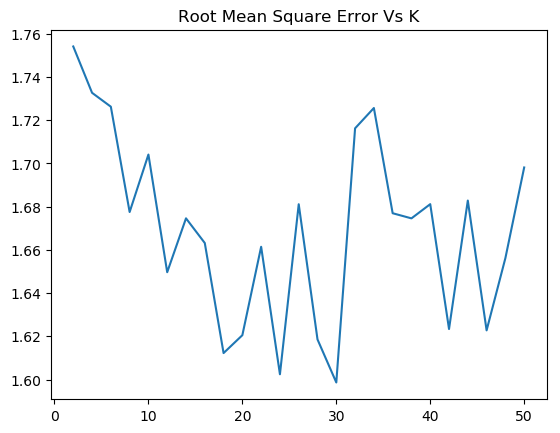

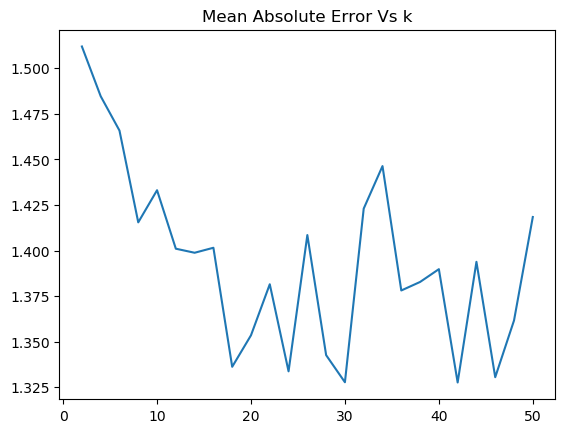

Average RMSE and MAE converge for k =  8
Average RMSE at convergence:  1.67750169249
Average MAE at convergence:  1.41548693153


(8,
 [1.7540792284684095,
  1.7326503853029511,
  1.7262204652616184,
  1.6775016924924782,
  1.7040830655775774,
  1.6496561027494714,
  1.6745822399022472,
  1.6631624616170508,
  1.612247082132674,
  1.6205206084702095,
  1.6614235277856053,
  1.602445554765509,
  1.6811024921301549,
  1.6185537766302502,
  1.5986459466801832,
  1.7162212165478057,
  1.7256180712411193,
  1.6769405597656288,
  1.6745645183715645,
  1.6811391126765003,
  1.6233780874745531,
  1.6827979574160725,
  1.6227460757730472,
  1.6561816243124194,
  1.6981103392965444],
 [1.511963565995897,
  1.4846824346031942,
  1.4658426181925892,
  1.415486931531164,
  1.4331141997969779,
  1.4010322765540917,
  1.3988097885760842,
  1.4015489192194701,
  1.3362564163535702,
  1.3535297927623247,
  1.3815300556219641,
  1.3337556740155212,
  1.4085115662108945,
  1.3426514872618092,
  1.3277756225389266,
  1.4230243857921889,
  1.4463510516819098,
  1.3781170674134582,
  1.3827914074308769,
  1.3898057155016021,
  1.32765

In [352]:
runKFoldAlgo("NMF", "Variance", 10, 2, 52, 2)

#### Question 22: Plot the ROC curves for the NNMF-based collaborative filter designed in question 17 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the optimal number of latent factors found in question 18. For each of the plots, also report the area under the curve (AUC) value.

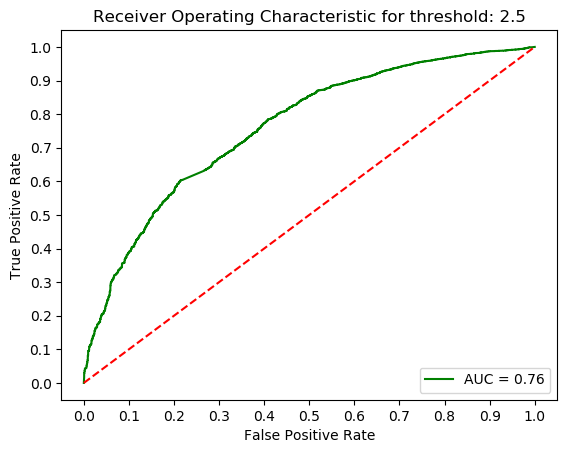

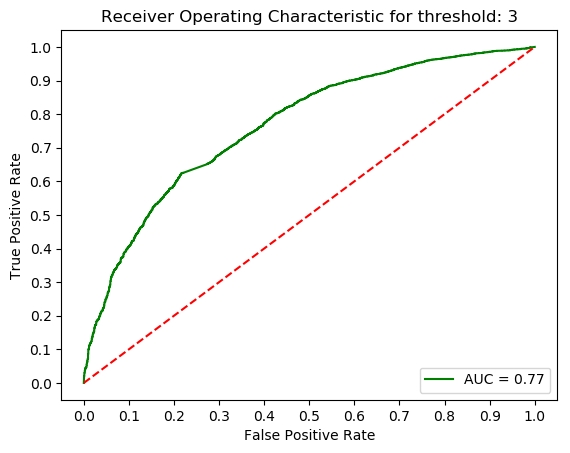

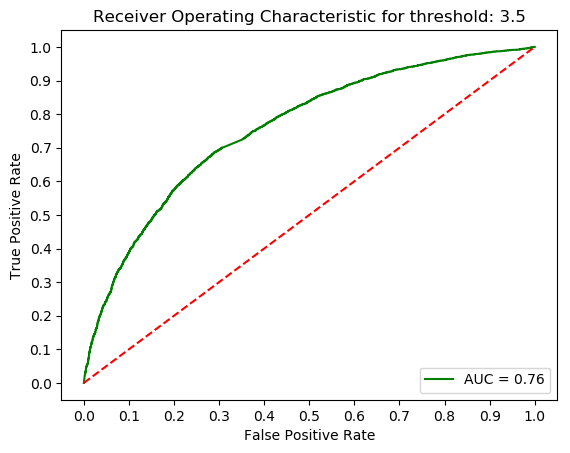

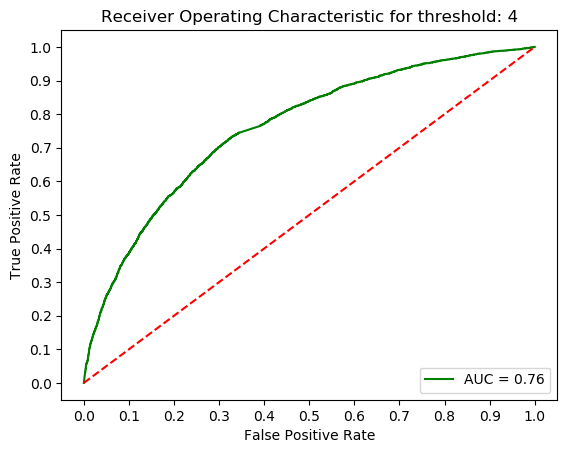

In [434]:
runAlgoROC("NMF", None, 0.1, [2.5,3,3.5,4], nmf_best_k)

#### Question 23: Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?

In [512]:
#k=20
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale=(0.5, 5))
file_path = 'ml-latest-small/ratings.csv'

data = Dataset.load_from_file(file_path, reader=reader)
trainset = data.build_full_trainset()

algo = NMF(n_factors=20,random_state=42)
algo.fit(trainset)

qi = algo.qi

In [517]:
genre = list()
movieMap = dict()
index = 0
with open('ml-latest-small/movies.csv', 'r', encoding='utf-8') as csvfile:
    rreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
    skip = 1
    
    for row in rreader:
        if skip == 1:
            skip = 0
            continue
        else:
            genre.append(row)
            movieMap[row[0]] = index
            index += 1
    

#print(genre[0])
import operator
newqi = qi.argsort(axis=0)[::-1][:10]
#print(newqi)
for j in range(20): 
    genreMap = dict()
    print("For latent factor: ", j)
    #print(newqi[:,j])
    for i in newqi[:,j]:
        rid = trainset.to_raw_iid(i)
        mID = movieMap[rid]
        l = genre[mID][-1].split('|')
        print(l)
        for g in l:
            genreMap[g] = genreMap.get(g, 1) + 1
    sorted_x = sorted(genreMap.items(), key=operator.itemgetter(1), reverse=True)
    
    print(sorted_x, "\n")
        

For latent factor:  0
['Drama', 'Mystery', 'Romance']
['Action', 'Comedy', 'Crime', 'Fantasy']
['Comedy', 'Documentary']
['Drama', 'War']
['Children', 'Comedy']
['Action', 'Adventure', 'Sci-Fi', 'War', 'IMAX']
['Thriller']
['Comedy', 'Western']
['Action', 'Adventure', 'Sci-Fi', 'IMAX']
['Drama']
[('Comedy', 5), ('Drama', 4), ('Action', 4), ('War', 3), ('Adventure', 3), ('Sci-Fi', 3), ('IMAX', 3), ('Mystery', 2), ('Romance', 2), ('Crime', 2), ('Fantasy', 2), ('Documentary', 2), ('Children', 2), ('Thriller', 2), ('Western', 2)] 

For latent factor:  1
['Comedy', 'Documentary']
['Adventure', 'Animation']
['Musical']
['Comedy', 'Romance']
['Drama', 'Fantasy', 'Horror']
['Comedy']
['Drama', 'Sci-Fi']
['Drama']
['Adventure', 'Drama', 'Sci-Fi']
['Drama', 'Romance']
[('Drama', 6), ('Comedy', 4), ('Adventure', 3), ('Romance', 3), ('Sci-Fi', 3), ('Documentary', 2), ('Animation', 2), ('Musical', 2), ('Fantasy', 2), ('Horror', 2)] 

For latent factor:  2
['Adventure', 'Drama', 'Fantasy', 'Romance'

#### Question 24: Design a MF with bias collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

#### Question 25: Use the plot from question 24, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE.

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


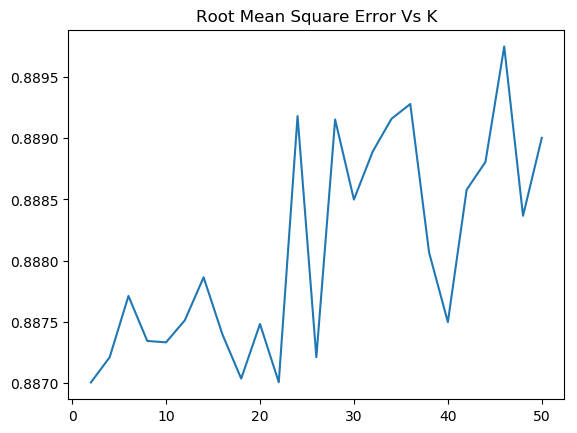

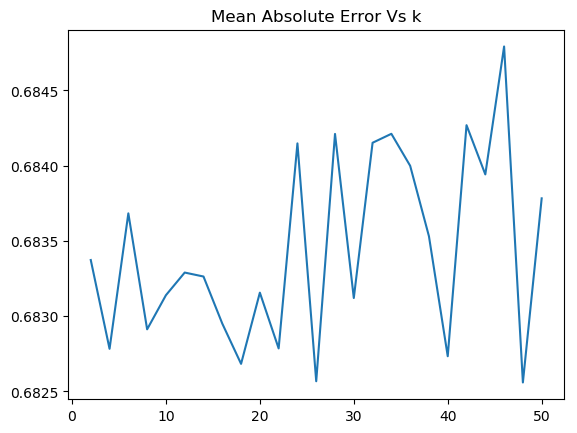

Average RMSE and MAE converge for k =  2
Average RMSE at convergence:  0.887005061726
Average MAE at convergence:  0.683372980489


In [355]:
svd_best_k, krmse_svd, kmae_svd = runKFoldAlgo("SVD", None, 10, 2, 52, 2)

In [433]:
svd_best_k = 2 * (krmse_svd.index(min(krmse_svd)) + 1)
print("Optimal Number of Latent Factors: ", svd_best_k)
print("Minimum RMSE: ", min(krmse_svd))
print("Minimum MAE: ", min(kmae_svd))

Optimal Number of Latent Factors:  2
Minimum RMSE:  0.887005061726
Minimum MAE:  0.68255951152


#### Question 26: Design a MF with bias collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


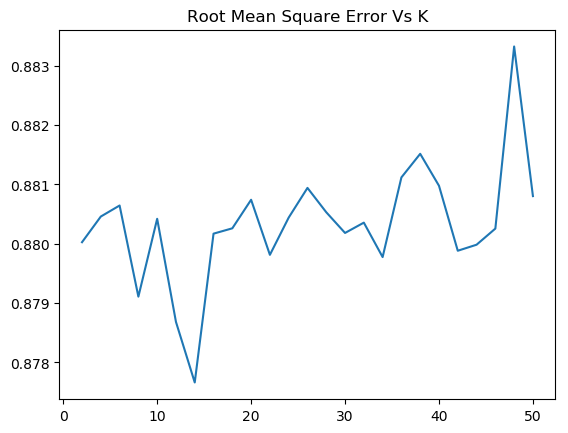

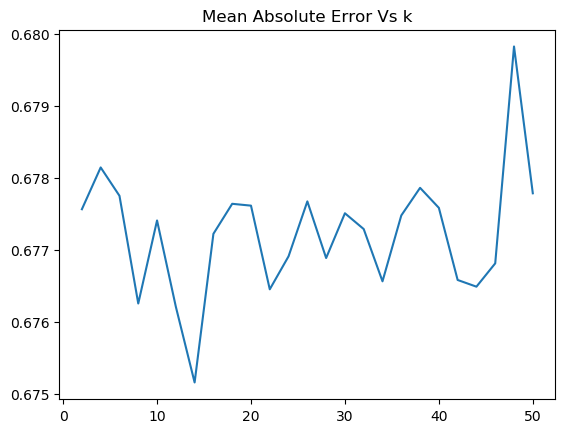

Average RMSE and MAE converge for k =  2
Average RMSE at convergence:  0.880026137815
Average MAE at convergence:  0.677563737176


(2,
 [0.88002613781460381,
  0.88045881143081262,
  0.88064467247890532,
  0.87910887773399682,
  0.88042074658286018,
  0.87868348177849831,
  0.87766212183449654,
  0.88017025153550976,
  0.88026033379255131,
  0.88074166469214421,
  0.87981342715889621,
  0.88044086780819364,
  0.88094138732427252,
  0.88053115766977963,
  0.8801822002047881,
  0.8803560225629582,
  0.87977550611828104,
  0.88111852333600882,
  0.88151584979073883,
  0.88097734214090251,
  0.87988227271593067,
  0.8799838463303995,
  0.88025573033024185,
  0.88332493482981644,
  0.88080317886247017],
 [0.67756373717625507,
  0.6781450055056597,
  0.67775042131026775,
  0.67625270842429663,
  0.67740763950082949,
  0.6762084918503064,
  0.67515458434734954,
  0.67722176335268736,
  0.67763927418194325,
  0.67761372048763435,
  0.67645016768026345,
  0.67690931632268725,
  0.67767291901632398,
  0.67688530542888858,
  0.67750759858786846,
  0.67728798222150866,
  0.67656132095410682,
  0.6774771074873025,
  0.67786147

In [356]:
runKFoldAlgo("SVD", "Popular", 10, 2, 52, 2)

#### Question 27: Design a MF with bias collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


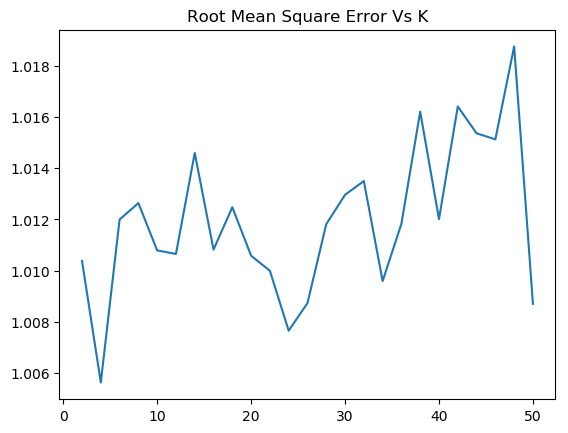

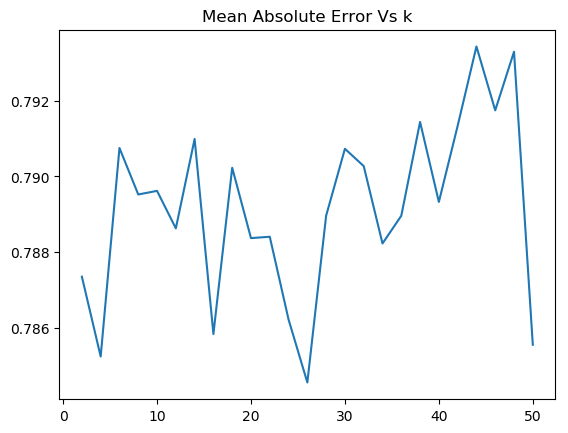

Average RMSE and MAE converge for k =  4
Average RMSE at convergence:  1.00563406521
Average MAE at convergence:  0.78524889371


(4,
 [1.0103824622058852,
  1.0056340652059079,
  1.0119965375224342,
  1.0126390204191396,
  1.0107903593888872,
  1.0106528962548231,
  1.0145950622884699,
  1.0108226830769962,
  1.012476209872077,
  1.0105848265349662,
  1.0099942009462943,
  1.007655493560214,
  1.0087342048780288,
  1.0118162373800885,
  1.0129626627031703,
  1.0134989317006409,
  1.0095948585275349,
  1.0118305653676549,
  1.0162087803070528,
  1.012012419847524,
  1.0164117693675421,
  1.0153638362156709,
  1.0151270218069159,
  1.0187540833436384,
  1.008704910692106],
 [0.78735366103519588,
  0.78524889371000051,
  0.79074858066675946,
  0.78952220586048383,
  0.78961752400081586,
  0.7886290031440234,
  0.79098542156132401,
  0.78584187787093207,
  0.79022696551202742,
  0.78837156587803747,
  0.78840756022044733,
  0.78622565916854203,
  0.78456472984967207,
  0.78896231110651804,
  0.79072727248716335,
  0.79027052111545604,
  0.78822994492868659,
  0.78896076539849547,
  0.79143452898191202,
  0.789326019

In [357]:
runKFoldAlgo("SVD", "UnPopular", 10, 2, 52, 2)

#### Question 28: Design a MF with bias collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it's performance using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


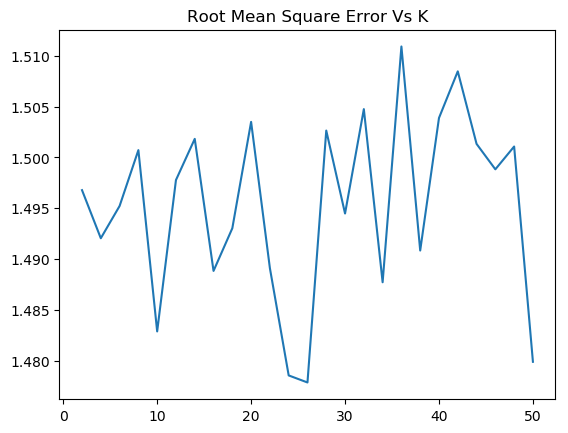

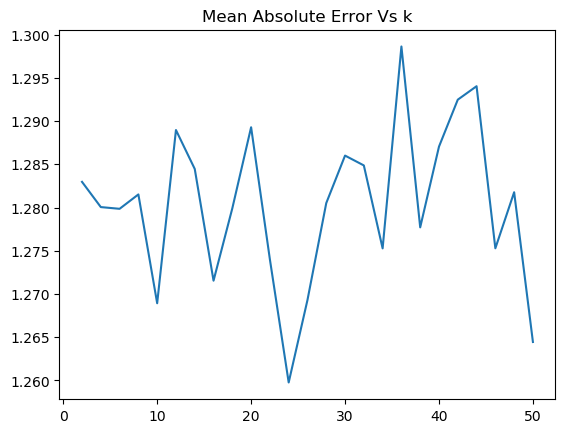

Average RMSE and MAE converge for k =  4
Average RMSE at convergence:  1.49205889193
Average MAE at convergence:  1.2800486581


(4,
 [1.4967887347667783,
  1.4920588919347249,
  1.4952311219095391,
  1.5007255183311101,
  1.4828976564693155,
  1.4977811870623001,
  1.5018302674384891,
  1.4888473077096329,
  1.4930411154478107,
  1.5035006467642906,
  1.4891166472213186,
  1.4785724563684137,
  1.4778784359706303,
  1.5026463214788977,
  1.4944910482845892,
  1.504755301447247,
  1.48773130258847,
  1.5109150628891173,
  1.4908526139519538,
  1.5038869264212111,
  1.5084687695443892,
  1.5013371103348385,
  1.498836418007971,
  1.5010791586239631,
  1.4799117227192089],
 [1.2829662470269843,
  1.2800486581042216,
  1.2798494497109161,
  1.2815125848020454,
  1.2689274219885101,
  1.2889608822565541,
  1.2844599123542535,
  1.271537469259123,
  1.2799084628589987,
  1.2892814738827703,
  1.2739938433039133,
  1.259765514327357,
  1.2693029806485989,
  1.2805102314113832,
  1.2860042733761818,
  1.284866698540722,
  1.2752731993474562,
  1.2986221663026558,
  1.2777052454322229,
  1.2870399237863546,
  1.29246962

In [358]:
runKFoldAlgo("SVD", "Variance", 10, 2, 52, 2)

#### Question 29: Plot the ROC curves for the MF with bias collaborative filter designed in question 24 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the optimal number of latent factors found in question 25. For each of the plots, also report the area under the curve (AUC) value.

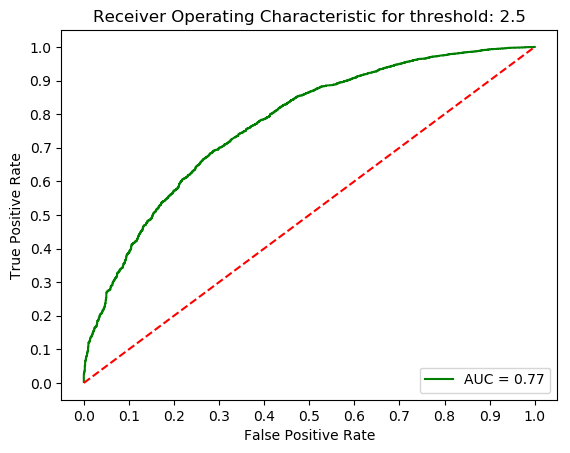

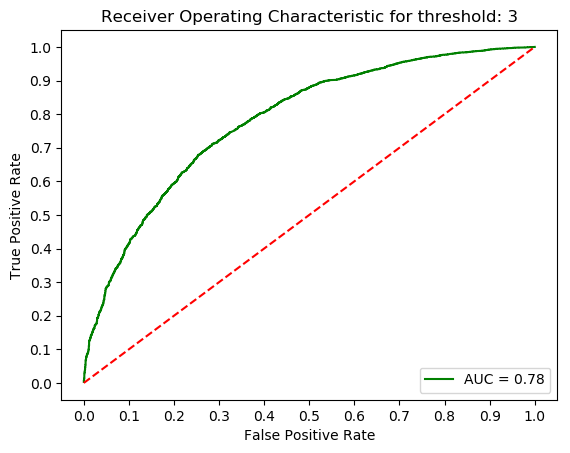

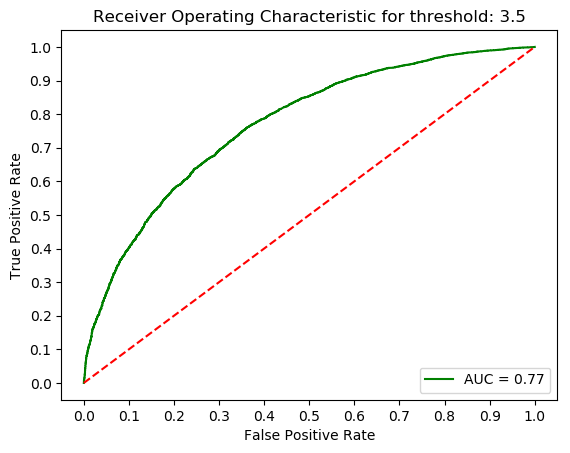

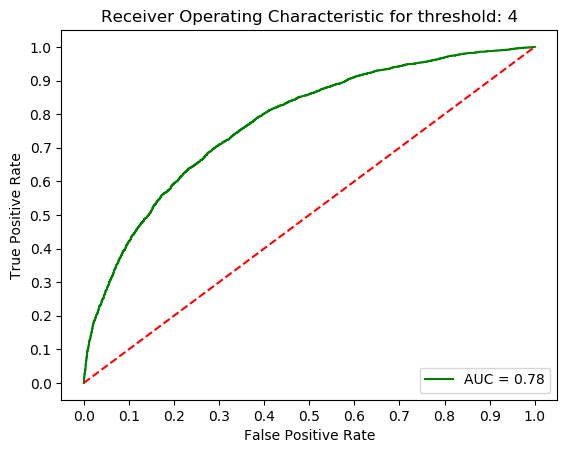

In [435]:
runAlgoROC("SVD", None, 0.1, [2.5,3,3.5,4], svd_best_k)

#### Question 30: Design a naive collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

In [375]:
naive_rmse, naive_mae = runKFoldAlgo("NaiveCollaborative", None, 10, 2, 4, 2)

naive_rmse, naive_mae

Running for k =  2


(0.95686922279104059, 0.74578669241395756)

#### Question 31: Design a naive collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it's performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

In [376]:
naive_rmse, naive_mae = runKFoldAlgo("NaiveCollaborative", "Popular", 10, 2, 4, 2)

naive_rmse, naive_mae

Running for k =  2


(0.95367084033646576, 0.74416909615146321)

#### Question 32: Design a naive collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it's performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

In [377]:
naive_rmse, naive_mae = runKFoldAlgo("NaiveCollaborative", "UnPopular", 10, 2, 4, 2)

naive_rmse, naive_mae

Running for k =  2


(1.0108116609797442, 0.77322056806945016)

#### Question 33: Design a naive collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it's perfor- mance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

In [378]:
naive_rmse, naive_mae = runKFoldAlgo("NaiveCollaborative", "Variance", 10, 2, 4, 2)

naive_rmse, naive_mae

Running for k =  2


(1.5230540579919989, 1.2633844105845642)

#### Question 34: Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.

Computing the pearson similarity matrix...
Done computing similarity matrix.


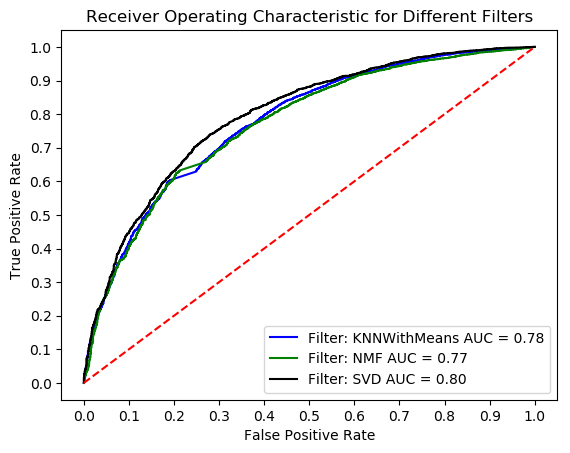

In [439]:
bestKDict = dict()
bestKDict['KNNWithMeans'] = knn_best_k
bestKDict['NMF'] = nmf_best_k
bestKDict['SVD'] = svd_best_k

combinedROC(['KNNWithMeans', 'NMF', 'SVD'], 0.1, 3, bestKDict)

Function for finding precision and recall

In [364]:
from surprise import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold
from surprise import accuracy
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn import metrics
from surprise.model_selection import train_test_split
from collections import defaultdict

def precision_recall_at_k(predictions, k, threshold):

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        if len(user_ratings) < k:
            continue
            
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

def runAlgoRanking(algoName, split, best_k):

    reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale=(0.5, 5))
    file_path = 'ml-latest-small/ratings.csv'

    data = Dataset.load_from_file(file_path, reader=reader)

    t_avg_prec = []
    t_avg_recall = []
    
    for t in range(1,26):
        kf = KFold(n_splits=split)

        algo = getAlgo(algoName, best_k)

        kfold_avg_prec = []
        kfold_avg_recall = []
        for trainset, testset in kf.split(data):
            algo.fit(trainset)

            predictions = algo.test(testset)

            precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)

            # Precision and recall can then be averaged over all users
            kfold_avg_prec.append(sum(prec for prec in precisions.values()) / len(precisions))
            kfold_avg_recall.append(sum(rec for rec in recalls.values()) / len(recalls))

        t_avg_prec.append(sum(kfold_avg_prec)/len(kfold_avg_prec))
        t_avg_recall.append(sum(kfold_avg_recall)/len(kfold_avg_recall))
        
    t = range(1,26)
    
    plt.plot(t, t_avg_prec, label='Precision')
    plt.title("Precision vs t")0
    plt.xlabel('t-->')
    plt.ylabel('Precision-->')
    plt.show()
    
    plt.plot(t, t_avg_recall, label='Recall')
    plt.title("Recall vs t")
    plt.xlabel('t-->')
    plt.ylabel('Recall-->')
    plt.show()
    
    plt.plot(t_avg_recall, t_avg_prec, label='Precision')
    plt.title('Precision vs Recall')
    plt.xlabel('Recall-->')
    plt.ylabel('Precision-->')
    plt.show()
        
    return t_avg_prec, t_avg_recall

#### Question 36: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using k-NN collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

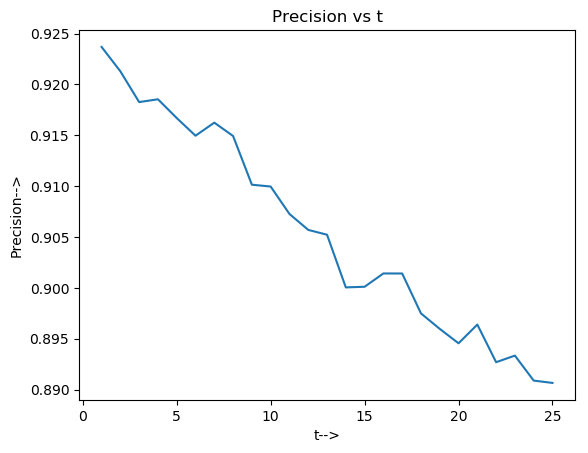

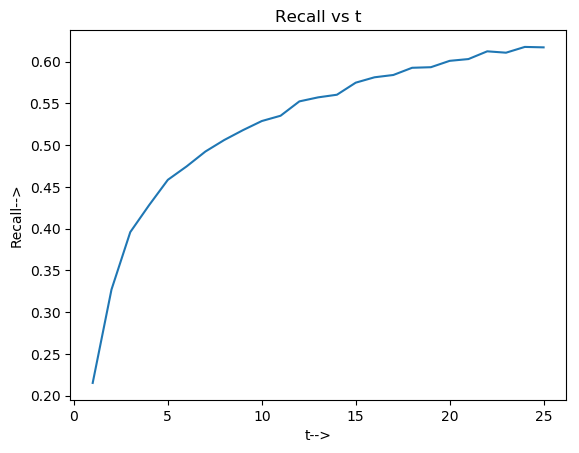

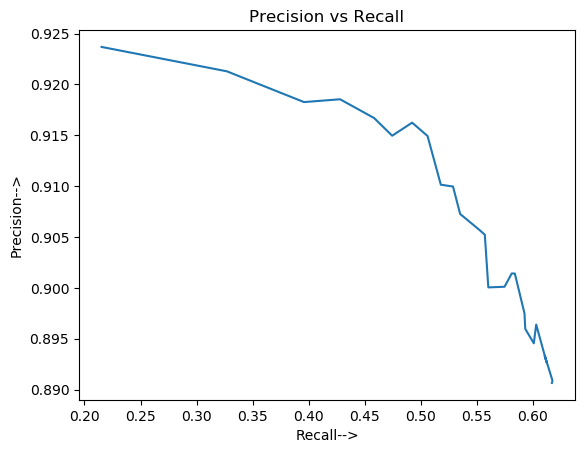

In [367]:
knn_avg_prec, knn_avg_recall = runAlgoRanking("KNNWithMeans", 10, knn_best_k)

#### Question 37: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using NNMF-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 18 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

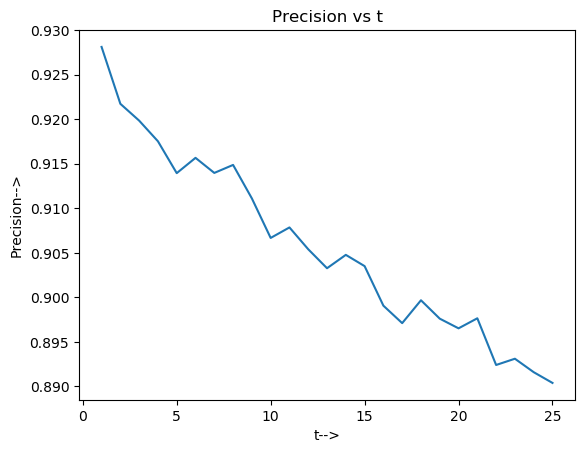

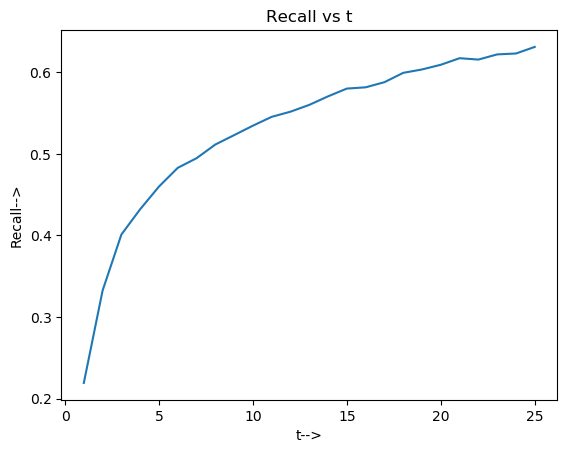

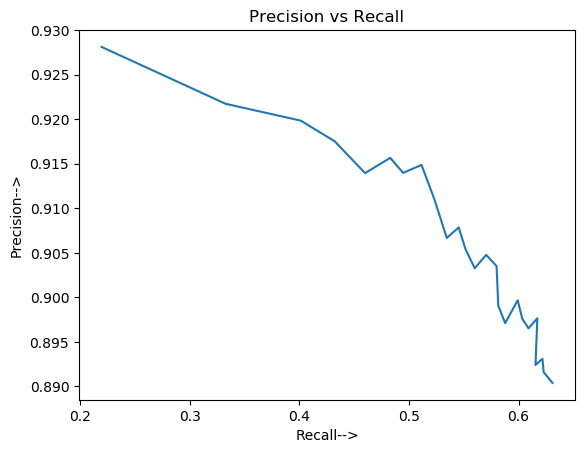

In [443]:
nmf_avg_prec, nmf_avg_recall = runAlgoRanking("NMF", 10, nmf_best_k)

#### Question 38: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using MF with bias-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 25 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

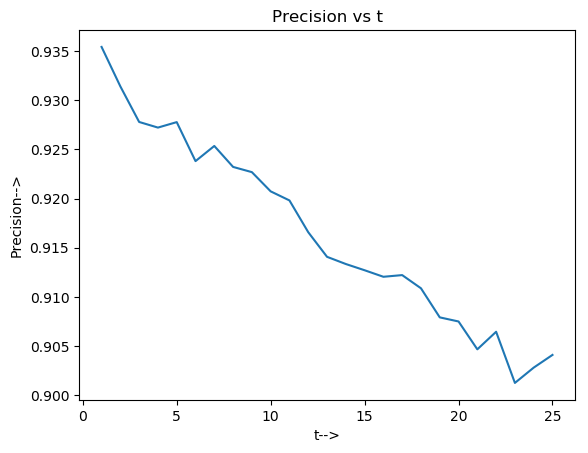

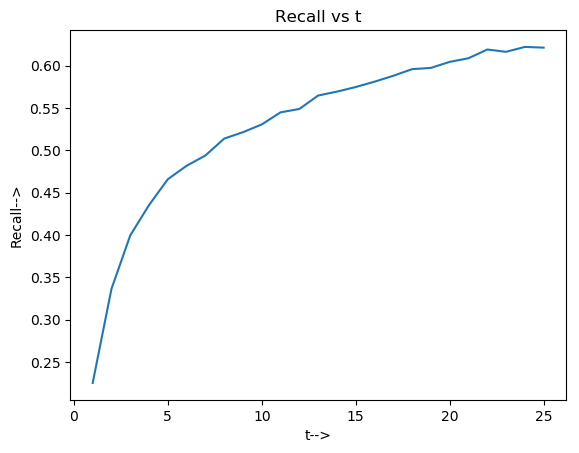

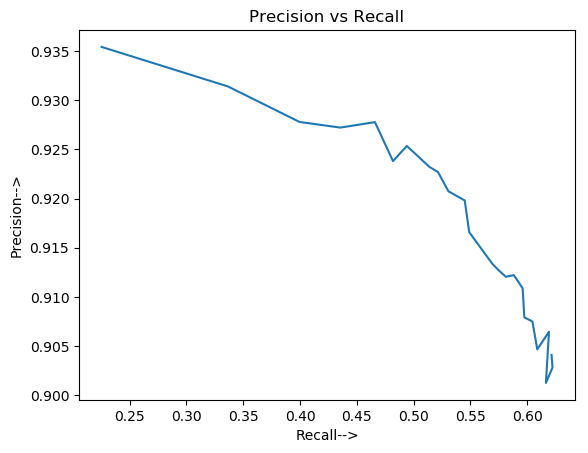

In [441]:
svd_avg_prec, svd_avg_recall = runAlgoRanking("SVD", 10, svd_best_k)

#### Question 39: Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recommendation list generated using k-NN, NNMF, and MF with bias predictions.

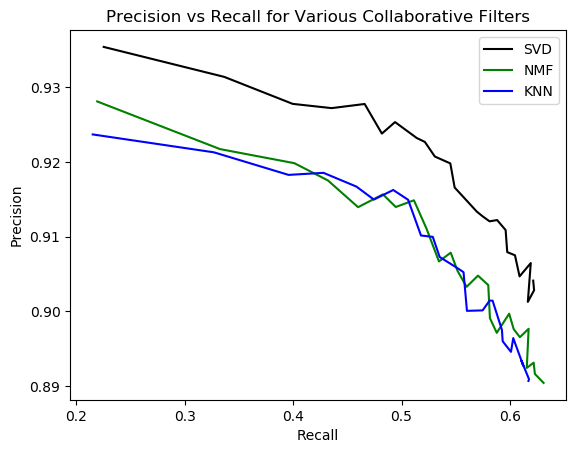

In [458]:
plt.plot(svd_avg_recall, svd_avg_prec, color = 'k', label='SVD')
plt.plot(nmf_avg_recall, nmf_avg_prec, color = 'g', label='NMF')
plt.plot(knn_avg_recall, knn_avg_prec, color = 'b', label='KNN')
plt.legend()
plt.title('Precision vs Recall for Various Collaborative Filters')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()